In [19]:
import os
print(os.listdir("/content/model"))


['tokenizer_config.json', 'special_tokens_map.json', 'model.safetensors', '.ipynb_checkpoints', 'vocab.txt', 'config.json']


Saving demo.csv to demo.csv
Saving test.csv to test.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Total samples: 160
Correct predictions: 130
Incorrect predictions: 30
Accuracy: 0.8125
F1 Score: 0.8163


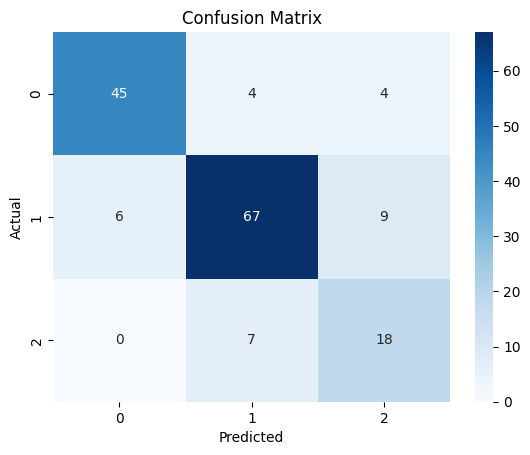

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
!pip install -q transformers scikit-learn seaborn

import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from google.colab import files
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load model and tokenizer
model_id = "butterr12/climate-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSequenceClassification.from_pretrained(model_id)

# Upload CSV files
uploaded = files.upload()

# === test.csv ===
df_test = pd.read_csv("test.csv")
inputs_test = tokenizer(df_test["text"].tolist(), return_tensors="pt", padding=True, truncation=True)

model.eval()
with torch.no_grad():
    outputs_test = model(**inputs_test)
    preds_test = torch.argmax(outputs_test.logits, dim=1).numpy()

df_test["predicted_label"] = preds_test
df_test.to_csv("test_predictions.csv", index=False)
files.download("test_predictions.csv")

# Evaluate metrics
actual = df_test["label"].values
correct = (actual == preds_test).sum()
incorrect = (actual != preds_test).sum()
total = len(actual)
accuracy = accuracy_score(actual, preds_test)
f1 = f1_score(actual, preds_test, average='weighted')

print(f"Total samples: {total}")
print(f"Correct predictions: {correct}")
print(f"Incorrect predictions: {incorrect}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(actual, preds_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# === demo.csv ===
df_demo = pd.read_csv("demo.csv")
inputs_demo = tokenizer(df_demo["text"].tolist(), return_tensors="pt", padding=True, truncation=True)

with torch.no_grad():
    outputs_demo = model(**inputs_demo)
    preds_demo = torch.argmax(outputs_demo.logits, dim=1).numpy()

df_demo["prediction"] = preds_demo
df_demo[["prediction"]].to_csv("predictions_deep.csv", index=False)
files.download("predictions_deep.csv")
